In [1]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("data/feedback.csv")

# Load the trained model
model = joblib.load("models/sentiment_model.pkl")

# Preprocess the data (reuse the same clean_text function)
def clean_text(text):
    import re
    from nltk.stem import WordNetLemmatizer
    from nltk.corpus import stopwords

    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

# Clean the feedback text
df['feedback_text'] = df['feedback_text'].astype(str).apply(clean_text)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['feedback_text'], df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment'])


Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       200
     Neutral       1.00      1.00      1.00       200
    Positive       1.00      1.00      1.00       200

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



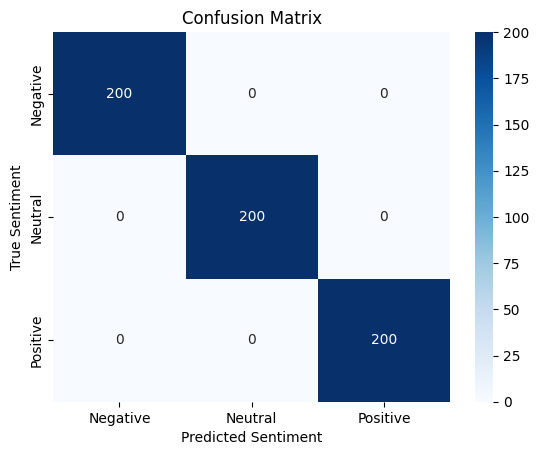

In [2]:
# Predict the sentiments for the test set
y_pred = model.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Sentiment")
plt.ylabel("True Sentiment")
plt.show()


Classification Report for Random Forest:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       200
     Neutral       1.00      1.00      1.00       200
    Positive       1.00      1.00      1.00       200

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



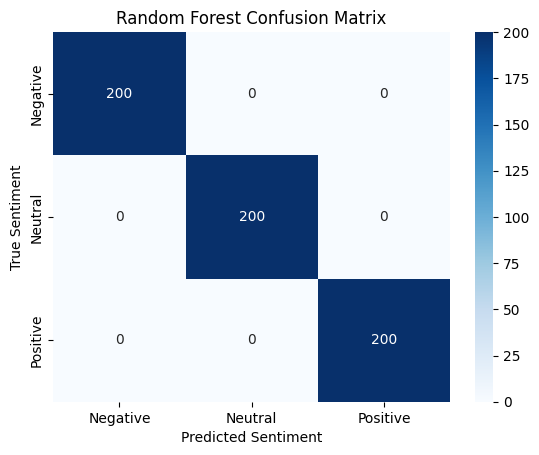

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Add this import
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline  # Add this import
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Update model to RandomForest
model_rf = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=5000)),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the new model
model_rf.fit(X_train, y_train)

# Evaluate the new model
y_pred_rf = model_rf.predict(X_test)
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Blues", xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Sentiment")
plt.ylabel("True Sentiment")
plt.show()


In [8]:
import nlpaug.augmenter.word as naw

# Augment the data with word synonyms
aug = naw.SynonymAug(aug_p=0.1)  # 10% of words will be replaced with synonyms
df['augmented_feedback'] = df['feedback_text'].apply(lambda x: aug.augment(x))

# Merge augmented feedback with original feedback
augmented_df = df.append(df[['augmented_feedback', 'sentiment']].rename(columns={'augmented_feedback': 'feedback_text'}), ignore_index=True)


C:\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Diya Jogesh Tank\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger_eng[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger_eng')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger_eng/[0m

  Searched in:
    - 'C:\\Users\\Diya Jogesh Tank/nltk_data'
    - 'C:\\Python310\\nltk_data'
    - 'C:\\Python310\\share\\nltk_data'
    - 'C:\\Python310\\lib\\nltk_data'
    - 'C:\\Users\\Diya Jogesh Tank\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_rf, X_train, y_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")
